In [1]:
from __future__ import print_function

# Lab 1

## Introduction

(Comment: We haven't introduced ipython notebooks yet, but you will become intimately familiar with them eventually.

This is a basic introduction to IPython and pandas functionality. <a href="http://pandas.pydata.org/">Pandas</a> (Python Data Analysis Library) "is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language." It (pandas) provides <a href="http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe">dataframe</a> functionality for reading/accessing/manipulating data in memory. You can think of a data frame as a table of indexed values.

What you're currently looking at is an IPython Notebook, this acts as a way to interactively use the python interpreter as well as a way to display graphs/charts/images/markdown along with code. IPython is commonly used in scientific computing due to its flexibility. Much more information is available on the <a href='http://ipython.org/'>IPython</a> website.

Often data is stored in files, and the first goal is to get that information off of disk and into a dataframe. Since we're working with limited resources in this VM we'll have to use samples of some of the files. Don't worry though, the same techniques apply if you're not sampling the files for exploration.

**Tip**: If you ever want to know the various keyboard shortcuts, just click on a (non-code) cell or the text "In []" to the left of the cell, and press the *H* key. Or select *Help* from the menu above, and then *Keyboard Shortcuts*.)

### Runtime info

(Comment: Python modules are often changing. I had to make several changes to get this code from 2018 to work in 2020. This highlights the importance of documenting the libraries and python version that were used to generate a particular output.

Note that all of the below commands are **shell commands**, i.e. run from the Unix/Mac command prompt. Windows users can either run them with the ! command below, or install a functioning command line. This is possible via [Native Ubuntu](https://altis.com.au/installing-ubuntu-bash-for-windows-10/), [Cmder](https://cmder.net/)

Python handles versioning with something called [requirements.txt](https://medium.com/@boscacci/why-and-how-to-make-a-requirements-txt-f329c685181e). I have done this for this project, using the recommended way to record the status of every package:

```{bash}
pip3 freeze > requirements.txt
```

This can then in theory be exactly replicated on your system using 

```{bash}
pip3 install -r requirements.txt
```

However, if we just do this, we may have all sorts of versioning problems if you and I have slightly different verisons of python. Instead, we create a **Virtual Environment**, in which we can install a specified set of packages and which we can do what we like with without messing up the rest of the system.

To do this, I followed the instructions to do this with [venv](https://janakiev.com/blog/jupyter-virtual-envs/)

```{bash}
python3 -m venv project0
```

This creates a new directory called `project0` in your working directory

```{bash}
source project0/bin/activate
jupyter-notebook # Run Jupyter-notebook in the virtual environment
```

When you are done, you tear-down the virtual environment with

```{bash}
deactivate
```

Requirements management can be done many ways and there are several tools to do it "better". The pip freeze approach is [considered harmful](https://medium.com/@tomagee/pip-freeze-requirements-txt-considered-harmful-f0bce66cf895). Alternatives include, for example, [pip-tools](https://github.com/jazzband/pip-tools/).

R could also do with this sort of treatment, but more libraries are robust and remain backward compatable so tend to break less. Despite this, recording your package status is very valuable.)

## pip freeze and installing requirements

(Comment: It is completely ok to leave the comments in to protect the cell content from causing problems. This might also be done if you make some intermediate results which take ages to construct, and share them in the repository.

In this case, we document this step in `README.md`.) 

In [2]:
## NB I Did this:
# !pip3 freeze > ../requirements.txt

## To replicate my environment, you do this:
# !pip3 install -r ../requirements.txt

In [3]:
import platform
print(platform.python_version())

3.7.7


# Python part of Assessment

This section of the submission deals with the python code. Make sure that `01-Data.Rmd` has been run in advance.

We will start by following the analyses performed on these data in the dataset documentation https://github.com/cyberdefendersprogram/MachineLearning/tree/master/Data_analysis/Bro%20Logs%20from%20Threatglass, as these are ipython notebooks.

We need to read the data using the pandas package. The processed data already contains the names of the data fields:

In [4]:
import pandas as pd
import os
logfile=os.path.join('..', 'data', 'processed', 'conn_sample.tab')
conn_df = pd.read_csv(logfile, sep=" ")

The next two commands check the data. First we look at the top few records, then we look at summaries:

In [5]:
conn_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
0,1.331901e+09,CqEvE71FftcS0D7zM3,192.168.202.79,50593,192.168.229.251,80,tcp,http,0.020000,165,214,SF,-,0,ShADfFa,4,381,3,382,(empty)
1,1.331901e+09,Cck0UY3jmmuyDVgsZi,192.168.202.100,45679,192.168.27.203,23,tcp,-,0.010000,0,0,REJ,-,0,Sr,1,44,1,40,(empty)
2,1.331901e+09,CEyHIk4u2L9KlqFuNl,192.168.202.76,51670,149.5.45.166,443,tcp,-,-,-,-,S0,-,0,S,1,48,0,0,(empty)
3,1.331901e+09,C32o1w47JHRaiNkRhk,192.168.202.76,51683,111.221.77.148,40004,tcp,-,3.010000,0,0,S0,-,0,S,2,104,0,0,(empty)
4,1.331901e+09,Ci9DCd3idxS5IC3Lai,192.168.202.79,53203,192.168.229.252,389,tcp,-,0.010000,40,2327,RSTR,-,0,ShADdFar,6,360,5,2583,(empty)


In [6]:
conn_df.describe()

,ts,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,2.269430e+05,226943.000000,226943.000000,226943.0,226943.000000,2.269430e+05,226943.000000,2.269430e+05
mean,1.331949e+09,42724.549980,20354.433906,0.0,1.813235,1.938409e+02,1.283723,2.534223e+02
std,4.271641e+04,15296.007136,20586.389532,0.0,157.018786,2.428806e+04,161.686809,3.703243e+04
min,1.331901e+09,3.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.331908e+09,35945.500000,2126.000000,0.0,1.000000,4.400000e+01,0.000000,0.000000e+00
50%,1.331928e+09,44316.000000,10146.000000,0.0,1.000000,4.800000e+01,1.000000,4.000000e+01
75%,1.331997e+09,54466.000000,37524.500000,0.0,1.000000,6.000000e+01,1.000000,4.000000e+01
max,1.332018e+09,65535.000000,65535.000000,0.0,63284.000000,9.694344e+06,64592.000000,1.402328e+07


The data are of varying types, the most important issue being that the timestamps are not read in as such (as they are stored as integers). So we run the following code to update this, and check it is right:

In [7]:
from datetime import datetime
conn_df['ts'] = [datetime.fromtimestamp(float(date)) for date in conn_df['ts'].values]
conn_df.dtypes

ts                datetime64[ns]
uid                       object
id.orig_h                 object
id.orig_p                  int64
id.resp_h                 object
id.resp_p                  int64
proto                     object
service                   object
duration                  object
orig_bytes                object
resp_bytes                object
conn_state                object
local_orig                object
missed_bytes               int64
history                   object
orig_pkts                  int64
orig_ip_bytes              int64
resp_pkts                  int64
resp_ip_bytes              int64
tunnel_parents            object
dtype: object

The script also recommends dropping some unimportant fields.


In [8]:
# conn_df.drop('sample', axis=1, inplace=True)
#conn_df.drop('threat', axis=1, inplace=True)
conn_df.drop('missed_bytes', axis=1, inplace=True)

The next activity is to create a new dataframe so that we can modify it. The below selects dns and ssl records, creates a total amount of bytes / packets column, replaces NA with 0 and then makes a scatter plot

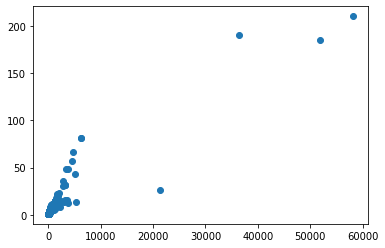

In [9]:
conn_df2=conn_df[(conn_df['service'] == 'dns') | (conn_df['service'] == 'ssl')]
conn_df2.assign(total_bytes=conn_df2['orig_bytes']+conn_df2['resp_bytes']);
conn_df2.assign(total_pkts=conn_df2['orig_pkts']+conn_df2['resp_pkts']);
conn_df2.fillna(0).head()

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(conn_df2['orig_ip_bytes'],conn_df2['orig_pkts']);
plt.show()

## Imports from later labs

The other labs dealt with different datasets. They are not in our remit, so we had to modify the plots that were available to work with our data.

The next trick is to set a column as an index. This allows some neat pandas trickery, 
and particularly, allows the timestamp to be nicely used as an x-exis in plotting.

NB We had to deal with inline plotting (notebook version differences), logarithmic scaling, and of course selection of columns.

In [10]:
conn_df = conn_df.set_index('ts')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


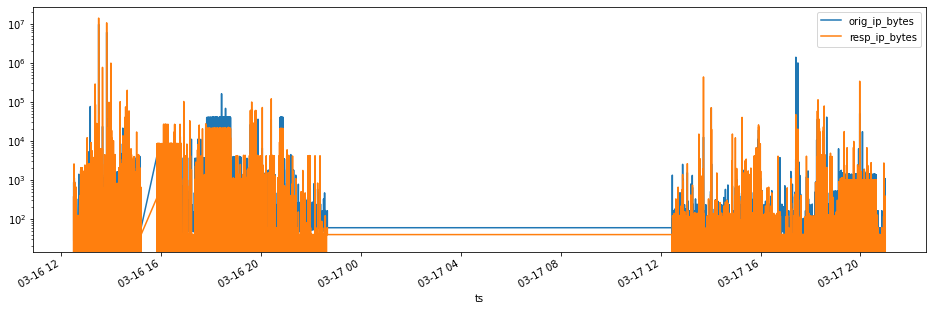

In [11]:
import matplotlib.pyplot as plt
%pylab inline 
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
df = conn_df[['orig_ip_bytes','resp_ip_bytes']]

df.plot(logy=True); # Had to modify this

This next example shows how to make a number of subplots. Again, it wasn't trivial to adapt this to our code; we had to look up what "resample" did with a timestamp. It was originally "M" for month, but we only have data for a day so we switched to "H" for hours.

The interesting thing about these plots is how clearly the missing data between 11PM and 1PM the next day show up!

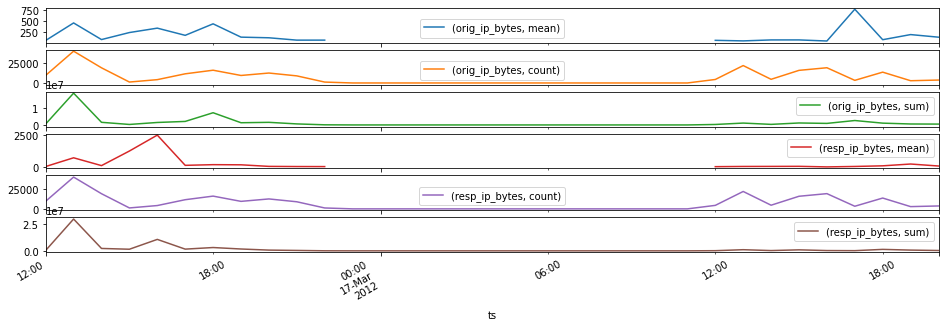

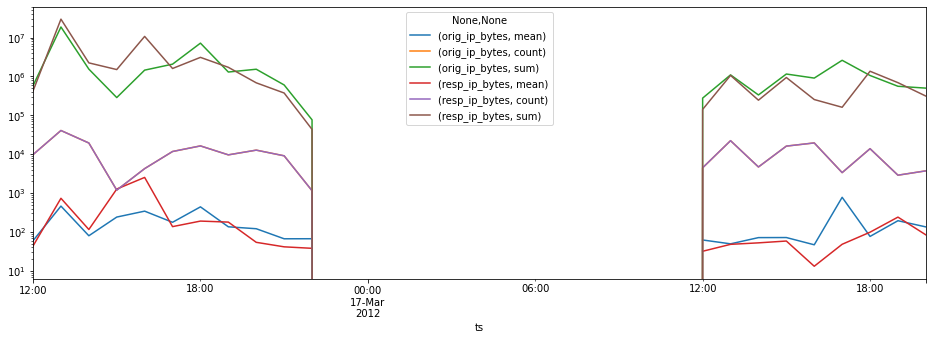

In [12]:
resamp = df.resample("H").agg(['mean', 'count', 'sum'])
resamp.plot(subplots=True)
resamp.plot(logy=True)

This next plot uses a groupby command to make a barplot. It had to be adapted to make it work on our data, we had to choose appropriate columns.

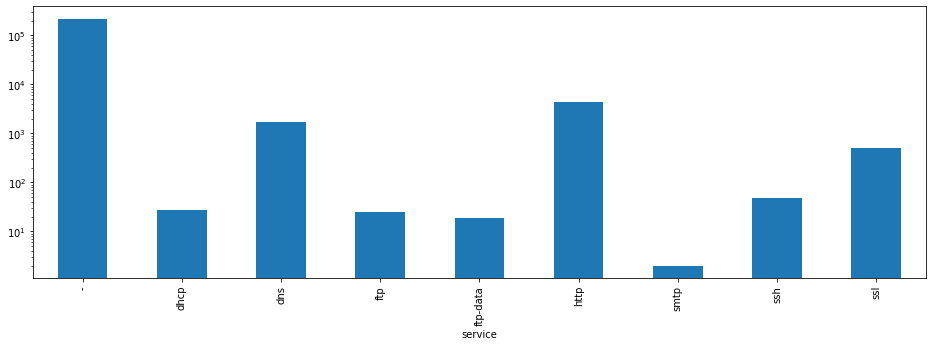

In [13]:
conn_df['count'] = 1
conn_df.groupby('service')['count'].sum().plot(kind='bar',logy=True)

This next plot demonstrates sorting and finding the top (10) largest groups and plotting only them. Again it was a little work to do the modification.

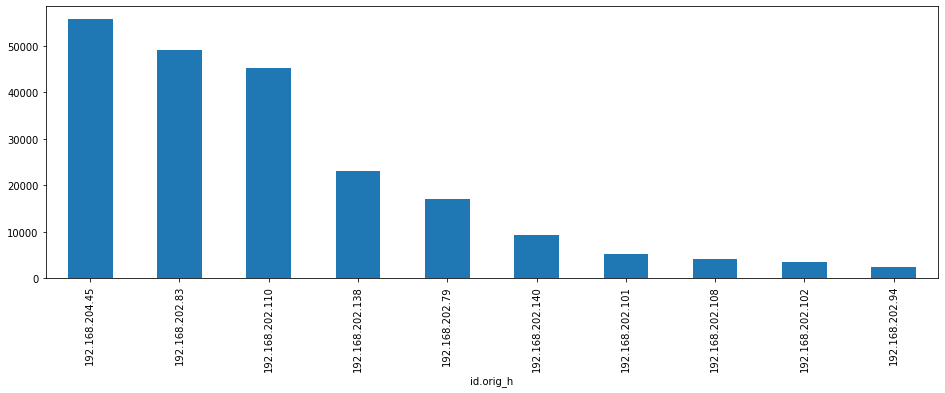

In [14]:
conn_df.groupby('id.orig_h')['count'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

Python also offers a stacked bar chart, which is somewhat confusingly best accessed with "unstack".  Again this required heavy modification to get to work on our dataset, including the colors, the details of what was grouped and unstacked, and the log scale.


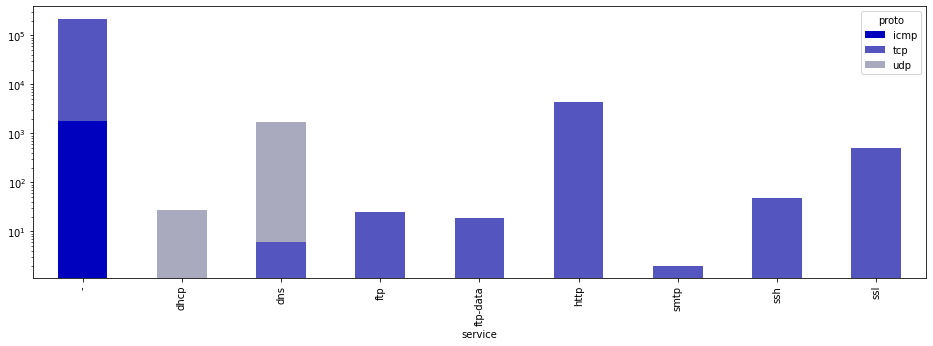

In [15]:
colors = [(x/3.0, x/3.0, 0.75) for x in range(len(conn_df['proto'].unique().tolist()))]
conn_df.groupby(['service','proto'])['count'].sum().unstack('proto').fillna(0).plot(
    color=colors, kind='bar', stacked=True, grid=False,logy=True)

Note that the log scale is misleading for bar plots, since the bars are stacked on top of each other the log scaling is affected by the order.

This is necessary for the missing data service to be included, but we can remove it and use a linear scaling. This gives a very different picture, of each service being on a single protocol.

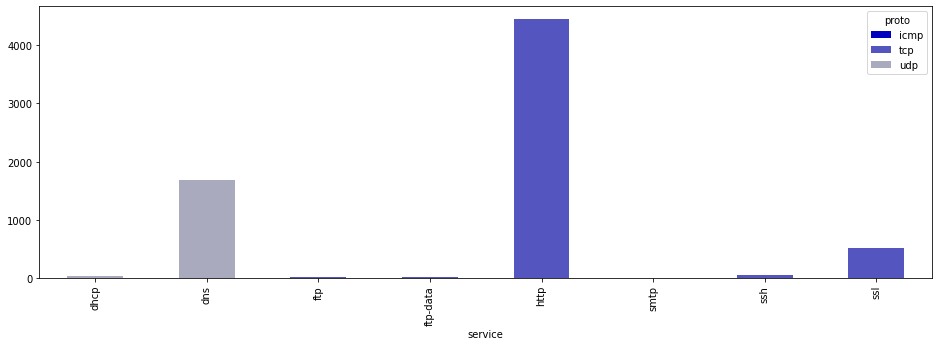

In [16]:
colors = [(x/3.0, x/3.0, 0.75) for x in range(len(conn_df['proto'].unique().tolist()))]
conn_df.groupby(['service','proto'])['count'].sum().unstack('proto').fillna(0)[1:].plot(
    color=colors, kind='bar', stacked=True, grid=False)

Finally, the Lab provides a boxplot. Again this needed modification to get it to work, and we made it more informative by applying it to several columns. Unfortunately the data scale is terrible:

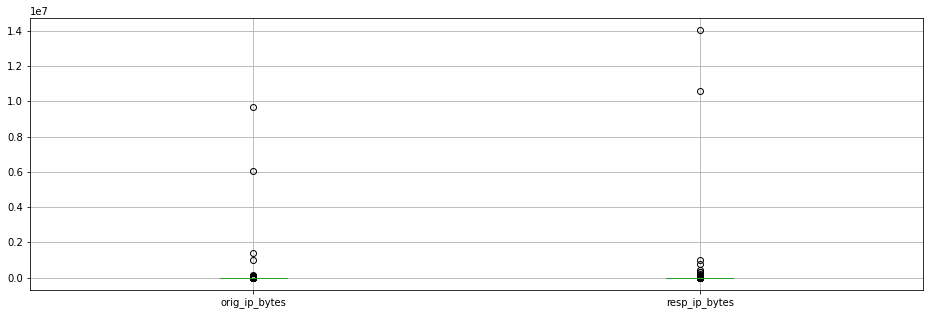

In [17]:
conn_df.boxplot(column=['orig_ip_bytes','resp_ip_bytes'])

To address this we tried subsetting the data to look at only smaller data. This has the effect of both showing the (marginal) distributions, and making a better "example plot" for the boxplot command.

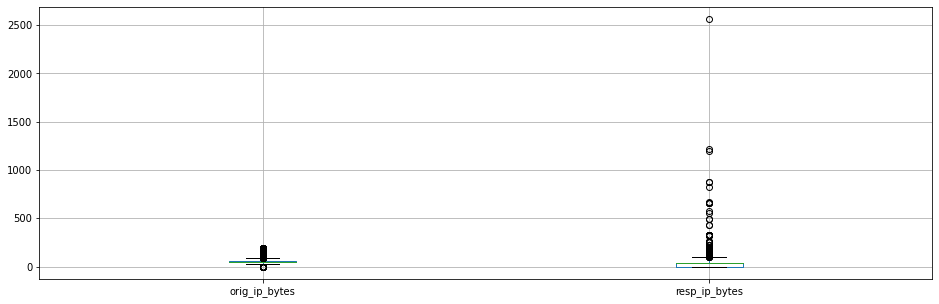

In [18]:
conn_df[conn_df.orig_ip_bytes < 200].boxplot(column=['orig_ip_bytes','resp_ip_bytes'])

The final plot we found does some model fitting. It creates a normal distribution with the same mean and standard deviation as the data, and plots it with a histogram.  This is quite informative for demonstrating just how badly behaved the data really are, as well as giving some clues about how to use several important functions.

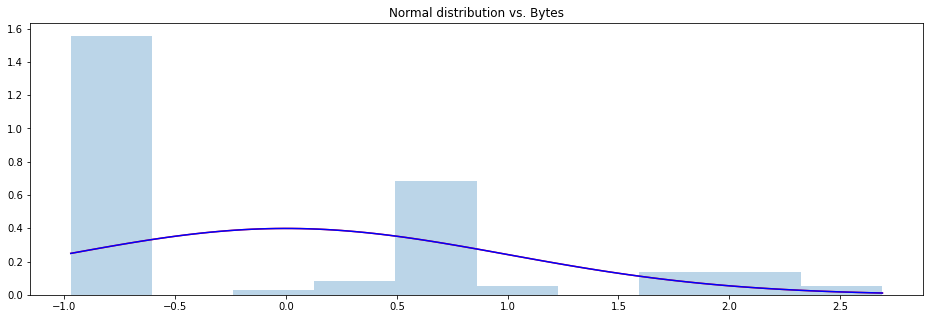

In [19]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title
from sklearn.preprocessing import scale
samp = scale(conn_df.orig_ip_bytes.tolist()[:100])

param = norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(min(samp),max(samp),len(samp))
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution vs. Bytes')
plot(x,pdf_fitted,'r-')
plot(x,pdf,'b-')
hist(samp,density=True,alpha=.3)
show()

## Correlation structure

From this website (http://nbviewer.jupyter.org/url/secrepo.com/honeypot/BSidesDFW%20-%202014.ipynb) we were able to find an example that ran on cyber data, and created a  correlation matrix. This was quite hard to get working on our data as it used quite a lot of complex ideas:

* subset (which we had to handle specially since our data used the index already, whereas the example data didn't)
* reindexing data
* pivot_table
* groupby: We had to figure out how to use the pivot table to group data by timestamp in a different way to the example
* obtaining the top N counts
* using the numpy matrix, we had to find fill_diagonal

The plot isn't clustered, and as the source material doesn't do this and it seems hard, it was considered beyond the remit of the assignment. It isn't necessary for interpretation.

The end result is a correlation matrix between IP addresses, where correlation is defined by the total number of events in time bins (of seconds and minutes).  The plot very clearly shows which IP addresses are correlated - and a few that are anti-correlated.

From the description of the dataset, we can guess that these IP addresses are associated with people, so we may be a) learning about the working patterns of the students involved, or b) learning which computers are controlled by a single person. Either way this would be useful in the context of the competition.

In [20]:
import pandas as pd 
cols = ['service','id.orig_h']
adf = pd.DataFrame()
adf = adf.append(conn_df[cols])
adf.reset_index(level=0, inplace=True)
subset = adf[['ts','service','id.orig_h']]
subset['count'] = 1
subset = subset.set_index('ts')
pivot = pd.pivot_table(subset, values='count', index=subset.index, columns=['id.orig_h'], fill_value=0)

grouped = pivot.groupby([(lambda x: x.minute), (lambda x: x.second)]).sum()

topN = subset['id.orig_h'].value_counts()[:30].index
corr_df = grouped[topN].corr()
corr_df.sort_values(by="id.orig_h",axis=0, inplace=True) # Just sorting so exploits names are easy to find
corr_df.sort_values(by="id.orig_h",axis=1, inplace=True)

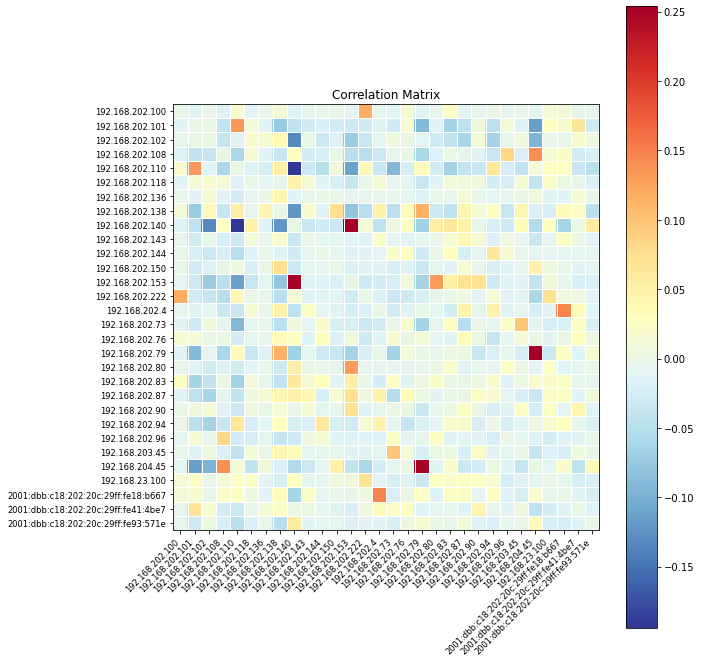

In [21]:
import statsmodels.api as sm
corr_matrix = corr_df.values
fill_diagonal(corr_matrix,0) ## MODIFICATION: The diagonal is too high and ruins the plot 
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
sm.graphics.plot_corr(corr_matrix, ynames=corr_df.index.tolist(), xnames=corr_df.columns.tolist())
plt.show()

## Conclusion

The resources that we found that dealt with cyber data were usually written in python but rarely had useful visualisations associated with them. Most of the data at www.secrepo.com doesn't come with a nice visualisation. The correlation matrix was by far the most informative plot and is what we chose to include in the figure. It was hard to get it working on our data but the end result is probably meaningful in that the idea of comparing when IP addresses are creating traffic seems sound. So we were able to provide more than a simple demonstration of the visualisation technology.